# Exploratory Data Analysis on Haberman's Survival

### Objective:
    Objective is to classify a patient survived 5 years/longer or died within 5 years for the given data set.

### Attribute Information:

    a. Age of patient at time of operation (numerical)
    b. Patient's year of operation (year - 1900, numerical)
    c. Number of positive axillary nodes detected (numerical)
    d. Survival status (class attribute)
        1 = the patient survived 5 years or longer
        2 = the patient died within 5 year

In [20]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
# load the data set
df = pd.read_csv('haberman.csv')

In [22]:
# check for number of rows and columns in df
df.shape

(305, 4)

There are 305 rows and 4 columns in the data. Let's find the column names and data types for respective columns


In [23]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


There are no column names present for the data given, let us go ahead and column names

In [24]:
#column names
df.columns = ['age', 'year', 'ax_nds', 'survival']
df.columns

Index(['age', 'year', 'ax_nds', 'survival'], dtype='object')

check for the shape to confirm number of rows not affected

In [25]:
df.shape

(305, 4)

In [26]:
df.dtypes

age         int64
year        int64
ax_nds      int64
survival    int64
dtype: object

In [27]:
df['survival'].value_counts()

1    224
2     81
Name: survival, dtype: int64

In [28]:
# Let's see the above numbers in percentage 
round(df['survival'].value_counts()/len(df)*100,2)

1    73.44
2    26.56
Name: survival, dtype: float64

Approximately, there are 73% of the people from the given data has survived for more than or equal to 5 years.

## Bivariate Analysis

### Pair plot

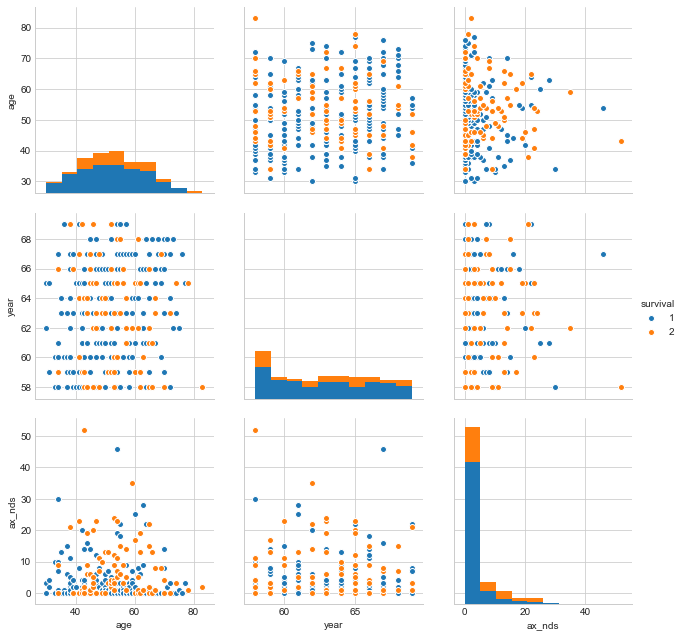

In [29]:
sns.pairplot(df, hue='survival', size=3, vars=['age', 'year', 'ax_nds'])
plt.show()

#### Conclusions
1. In plot number2, which is drawn between year in x-axis and age in y-axis we can see blue and orange scattered points are not reasonably seperable, so will go ahead and see for any better result in histograms and CDF for the same.
2. In plot number3, which is drawn between ax_nds in x-axis and age in y-axis points are overlapped much, we cant draw any conclusions from it.
3. In plot number 6 which is drawn between ax_nds in x-axis and year in y-axis also most of the points are overlapped, we can't draw conclusions from there as well.

## Univariate Analysis:

### Histogram

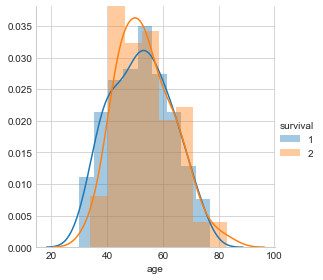

In [30]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='survival', size = 4) \
    .map(sns.distplot, 'age') \
    .add_legend();
plt.show();


#### Conclusion:
We can see from the above plot, both the CDF curves are overlapped from age 30 to 70. we can't draw any conclusion from it.

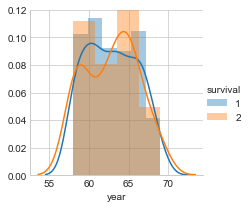

In [31]:
sns.FacetGrid(df, hue='survival')\
    .map(sns.distplot, 'year')\
    .add_legend();

#### Conclusion:
Even for year feature also, both the CDF curves are overlapping. we can't draw any conclusions from it.

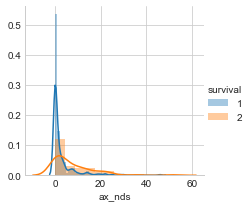

In [32]:
sns.FacetGrid(df, hue='survival')\
    .map(sns.distplot, 'ax_nds')\
    .add_legend();


#### Conclusion:
Among the variables, Axillary nodes seems to be more useful to classify wether a given patient can survive more than 5 years or dies within 5 years.

Here is the simple model using 'for loop' to classify:

if(ax_nds<=0):          
    print('Survived for more than 5 years')              
else:         
    print('not survived for 5 years')

### Probability Density Functions (PDF) & Cumulative Distribution Function (CDF)

In [33]:
df_1 = df[df.survival==1]
df_2 = df[df.survival==2]

In [38]:
def cdf(df, var, x=10):
    """ Takes Dataframe, Variable name and bin size as input and gives output plot shows PDF and CDF"""
    counts, bin_edges = np.histogram(df[var], bins=x, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(var)
    plt.title('CDF and PDF for ' +var+ ' variable' )

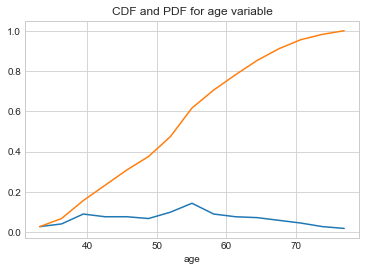

In [39]:
cdf(df_1, 'age', 15)

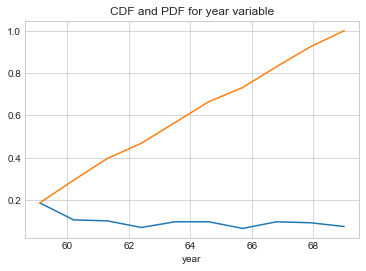

In [40]:
cdf(df_1, 'year')

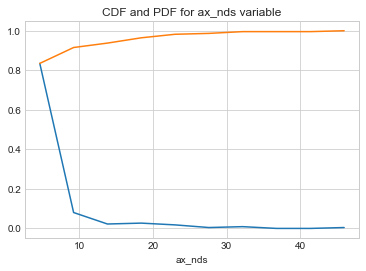

In [41]:
cdf(df_1, 'ax_nds')

#### Conclusion:
where the axillary nodes count is nearly zero, PDF is nearly 0.82 and decreased drastically with increasing axillary nodes in short span.

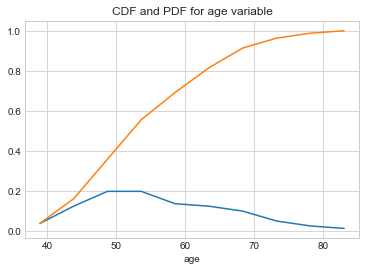

In [42]:
cdf(df_2, 'age')

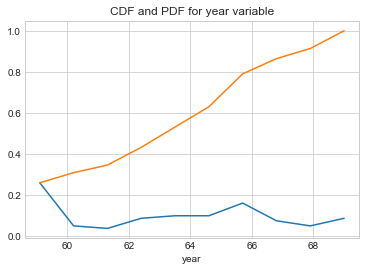

In [43]:
cdf(df_2, 'year')

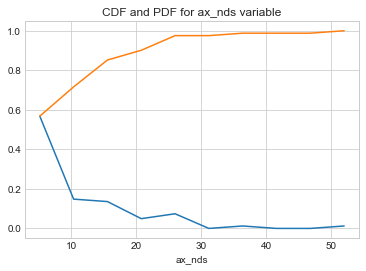

In [44]:
cdf(df_2, 'ax_nds')

### Box plot

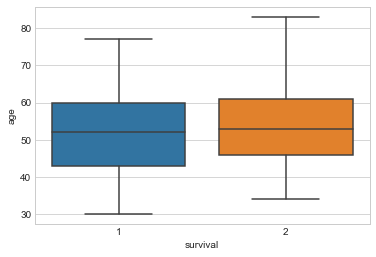

In [45]:
sns.boxplot(x='survival', y='age', data=df)
plt.show()

#### Conclusion:
For Age variable, we seeing no much variation to note down between the survival class.

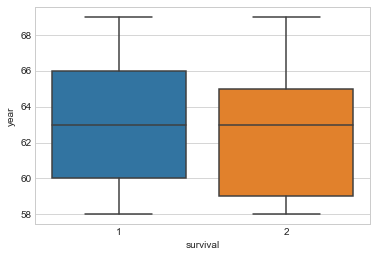

In [46]:
sns.boxplot(x='survival', y='year', data=df)
plt.show()

#### Conclusion:
Even for the Year variable also, we are not seeing much variations in the Boxplot

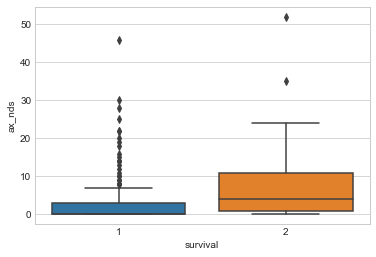

In [47]:
sns.boxplot(x='survival', y='ax_nds', data=df)
plt.show()

#### Conclusion:
Here, we can clearly see the difference. For nearly 50 percentile of the long survial people the axillary nodes count is nearly zero.

#### Violin plot

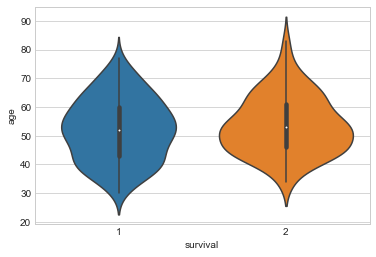

In [48]:
sns.violinplot(x='survival', y='age', data=df)
plt.show()

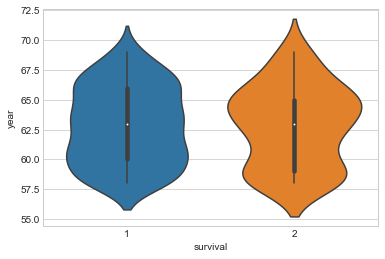

In [49]:
sns.violinplot(x='survival', y='year', data=df)
plt.show()

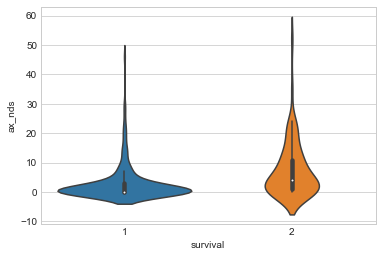

In [50]:
sns.violinplot(x='survival', y='ax_nds', data=df)
plt.show()